In [1]:
!pip install statsmodels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df= pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.rename(columns={'#Passengers': 'No. of thousands of passengers'},inplace=True)

In [5]:
df.head()

,Month,No. of thousands of passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.isnull().sum()

Month                             0
No. of thousands of passengers    0
dtype: int64

In [7]:
df.tail()

,Month,No. of thousands of passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           144 non-null    object
 1   No. of thousands of passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Our month should be datetime type for doing predictions

In [9]:
df['Month']= pd.to_datetime(df['Month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Month                           144 non-null    datetime64[ns]
 1   No. of thousands of passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Now it has got converted to datetime format

In [11]:
df.head()

,Month,No. of thousands of passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Now we are setting month column as index

In [12]:
df.set_index('Month', inplace=True)
df.head()

,No. of thousands of passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   No. of thousands of passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

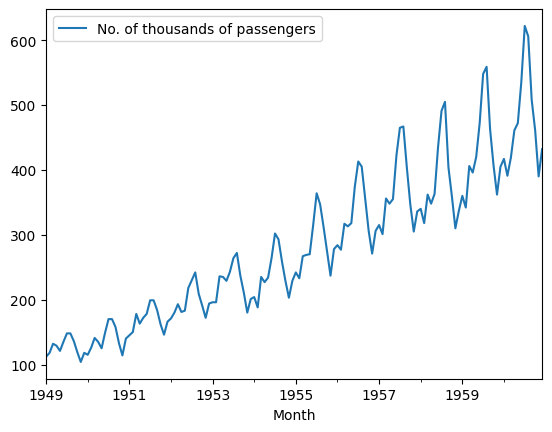

In [14]:
df.plot()

This is looking like a seasonal graph

In [15]:
from statsmodels.tsa.stattools import adfuller

Now to reject or accept a hypothesis, we are making a function

In [16]:
def adf_test(series):
    result= adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

    if result[1]<=0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationar")
    else:
        print("Weak evidence against the null hypothesis, null hypothesis get selected. Time series has a unit root, indicating it is not stationary.")
    

In [17]:
adf_test(df['No. of thousands of passengers'])

ADF Statistics: 0.8153688792060482
p-value: 0.991880243437641
Weak evidence against the null hypothesis, null hypothesis get selected. Time series has a unit root, indicating it is not stationary.


### Using techniques differencing
To make the data stationary

In [18]:
df['Passengers First Differance']= df['No. of thousands of passengers']-df['No. of thousands of passengers'].shift()

In [19]:
df.head()

,No. of thousands of passengers,Passengers First Differance
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [20]:
adf_test(df['Passengers First Differance'].dropna())

ADF Statistics: -2.8292668241699994
p-value: 0.0542132902838255
Weak evidence against the null hypothesis, null hypothesis get selected. Time series has a unit root, indicating it is not stationary.


12 months

In [21]:
df['Passengers Second Differance']= df['Passengers First Differance']- df['Passengers First Differance'].shift(1)

In [22]:
df.head()

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [23]:
adf_test(df['Passengers Second Differance'].dropna())

ADF Statistics: -16.384231542468505
p-value: 2.7328918500142407e-29
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationar


Now the data is staionary

In [24]:
#12 months
df['Passengers 12 differance']= df['No. of thousands of passengers']- df['No. of thousands of passengers'].shift(12)

In [25]:
adf_test(df['Passengers 12 differance'].dropna())

ADF Statistics: -3.383020726492481
p-value: 0.011551493085514954
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationar


So we can see from seasonal data also  
For seasonal data, sometimes SARIMAX works better than ARIMA Model


## ACF and PACF Plots

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


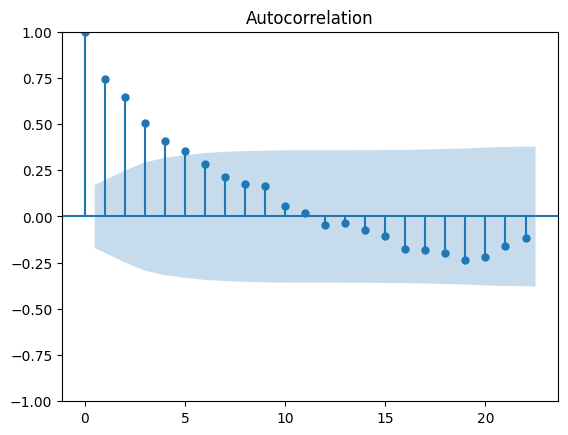

In [27]:
acf12= plot_acf(df['Passengers 12 differance'].dropna())

Here Q=5

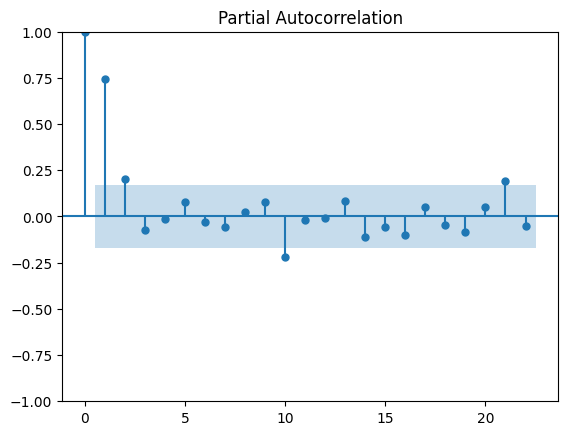

In [28]:
pacf12= plot_pacf(df['Passengers 12 differance'].dropna())

The darkenened blue lines are showing upper bound and lower bound. The band is increasing as we going up. That shows error part is also increasing  
Here's how you can interpret PACF plots:

If the PACF plot shows significant spikes at certain lags that exceed the significance thresho d (usually shown as dashed lines), it suggests that there's a direct relationship between the variable's current value and its past values at those lag  
.
Non-significant spikes are often interpreted as indicating that the autocorrelation at those lags is not significantly different from zero.

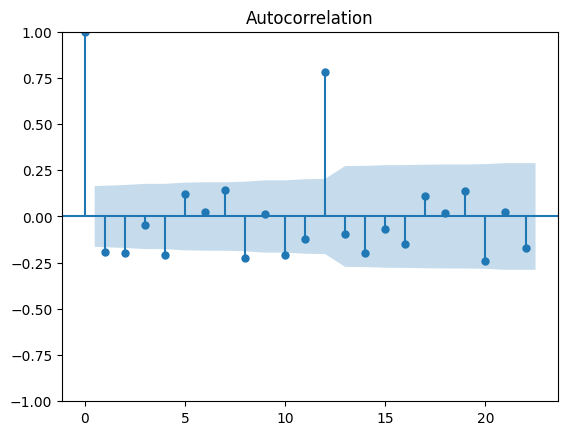

In [29]:
acf= plot_acf(df['Passengers Second Differance'].dropna())

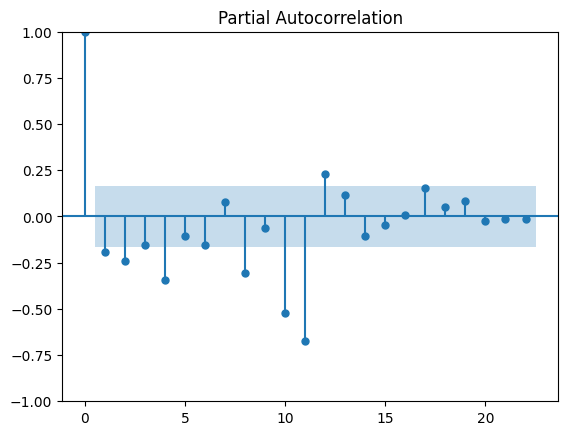

In [30]:
result = plot_pacf(df['Passengers Second Differance'].dropna())

With the help of PACF- We performing Auto Regression  
With the help of ACF- We performing Moving Average

## Split train and test data


In [31]:
df

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance,Passengers 12 differance
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [32]:
from datetime import datetime,timedelta
train_df_end=datetime(1955,12,1)
test_df_end=datetime(1960,12,1)

In [33]:
train_data=df[:train_df_end]
test_data=df[train_df_end+timedelta(days=1):test_df_end]

### Predictions

In [34]:
pred_start= test_data.index[0]
pred_end= test_data.index[-1]

In [35]:
test_data.head()

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance,Passengers 12 differance
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0


# Create a ARIMA Model

In [36]:
train_data.head()

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance,Passengers 12 differance
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train_data' is your DataFrame and 'No. of thousands of passengers' is your column
model_ARIMA = ARIMA(train_data['No. of thousands of passengers'], order=(10, 2, 0))


C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
model_Arima_fit= model_ARIMA.fit()

In [40]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     No. of thousands of passengers   No. Observations:                   84
Model:                            ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                            Sun, 31 Mar 2024   AIC                            736.477
Time:                                    00:01:21   BIC                            762.951
Sample:                                01-01-1949   HQIC                           747.106
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1. for P> mode z <0.005, they have postive impact
2. 

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train_data' is your DataFrame and 'No. of thousands of passengers' is your column
model_ARIMA = ARIMA(train_data['No. of thousands of passengers'], order=(0, 2, 0))


C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model_Arima_fit= model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     No. of thousands of passengers   No. Observations:                   84
Model:                             ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                            Sun, 31 Mar 2024   AIC                            773.584
Time:                                    00:01:21   BIC                            775.991
Sample:                                01-01-1949   HQIC                           774.550
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5859    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
test_data

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance,Passengers 12 differance
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


## Predictions

In [44]:
pred_start_date= test_data.index[0]
pred_end_date= test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [45]:
pred= model_Arima_fit.predict(start=pred_start_date, end= pred_end_date)
residuals= test_data['No. of thousands of passengers']-pred

In [46]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

In [47]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

<Axes: ylabel='Density'>

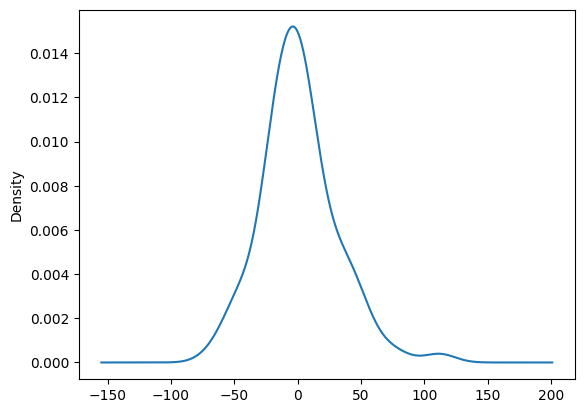

In [48]:
model_Arima_fit.resid.plot(kind='kde')

"KDE" stands for Kernel Density Estimate. It's a way to estimate the probability density function of a continuous random variable based on a finite data sample.  
A Kernel Density Estimate plot is a smoothed version of a histogram, which provides a non-parametric way to estimate the probability density function of the data. It gives you an idea of the distribution of the residuals of your model. By visualizing the KDE plot, you can assess whether the residuals are approximately normally distributed or if there are any patterns or outliers present in the residuals, which can help you evaluate the goodness of fit of your model.

In [49]:
test_data['Predicted_ARIMA']= pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_16688\3225172005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']= pred


In [50]:
test_data

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance,Passengers 12 differance,Predicted_ARIMA
Month,,,,,
1956-01-01,284,6.0,-35.0,42.0,319.0
1956-02-01,277,-7.0,-13.0,44.0,360.0
1956-03-01,317,40.0,47.0,50.0,401.0
1956-04-01,313,-4.0,-44.0,44.0,442.0
1956-05-01,318,5.0,9.0,48.0,483.0
1956-06-01,374,56.0,51.0,59.0,524.0
1956-07-01,413,39.0,-17.0,49.0,565.0
1956-08-01,405,-8.0,-47.0,58.0,606.0
1956-09-01,355,-50.0,-42.0,43.0,647.0


<Axes: xlabel='Month'>

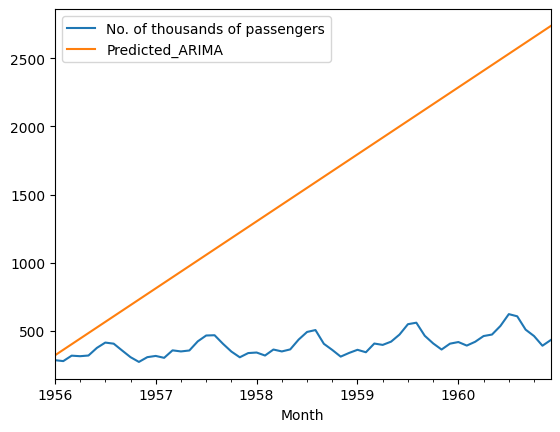

In [51]:
test_data[['No. of thousands of passengers', 'Predicted_ARIMA']].plot()

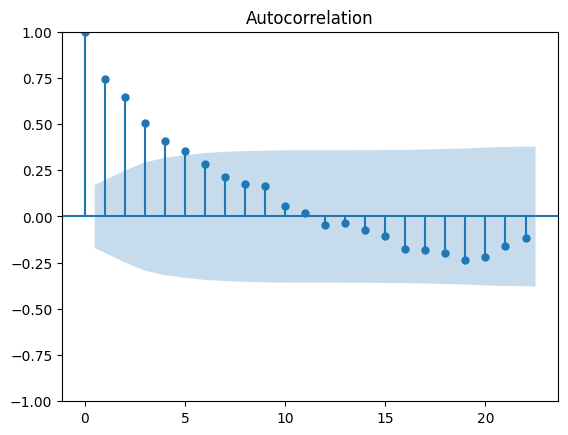

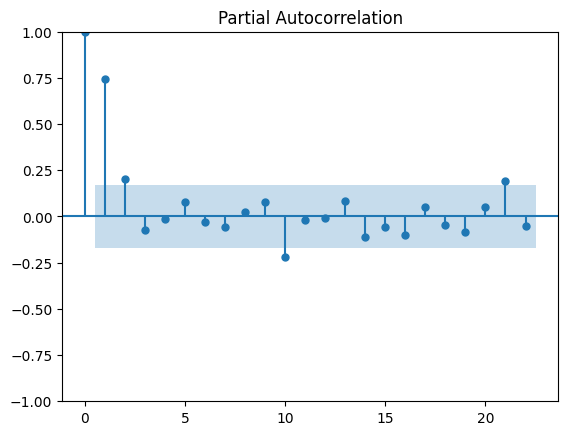

In [52]:
acf12 = plot_acf(df["Passengers 12 differance"].dropna())
pacf12 = plot_pacf(df["Passengers 12 differance"].dropna())

# Creating a SARIMA Model

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
model_SARIMA= SARIMAX(train_data['No. of thousands of passengers'], order=(3,0,5), seasonal_order=(0,1,0,12))

C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:      No. of thousands of passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sun, 31 Mar 2024   AIC                            548.481
Time:                                     00:01:22   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1837      1.165      0.158      0.875      -2.099       2.467
ma.L2         -0.5341      1.263     -0.423      0.672      -3.009       1.940
ma.L3         -0.0986      0.384     -0.257      0.798      -0.852       0.655
ma.L4         -0.1273      0.338     -0.377      0.706      -0.789       0.535
ma.L5          0.2471      0.357      0.693      0.489      -0.452       0.947
sigma2        87.7323     81.217      1.080      0.280     -71.451     246.915
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
test_data.tail()

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance,Passengers 12 differance,Predicted_ARIMA
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,2574.0
1960-09-01,508,-98.0,-82.0,45.0,2615.0
1960-10-01,461,-47.0,51.0,54.0,2656.0
1960-11-01,390,-71.0,-24.0,28.0,2697.0
1960-12-01,432,42.0,113.0,27.0,2738.0


### Predictions

In [58]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [59]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['No. of thousands of passengers']-pred_Sarima

<Axes: xlabel='Month'>

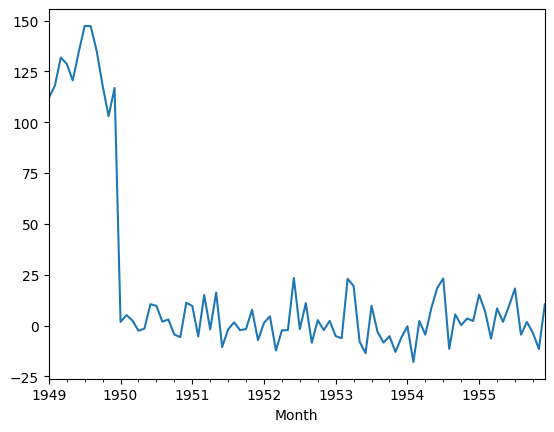

In [60]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

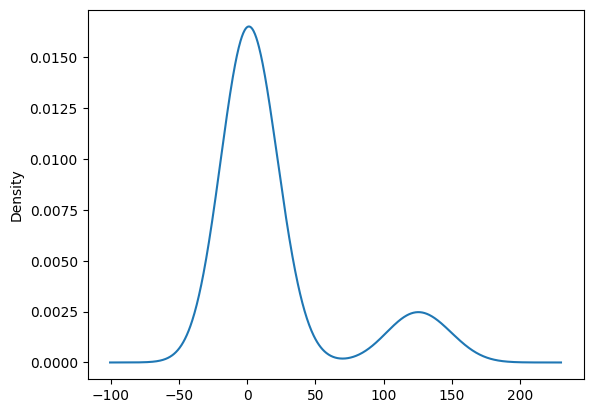

In [61]:
model_SARIMA_fit.resid.plot(kind='kde')

In [62]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Admin\AppData\Local\Temp\ipykernel_16688\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [63]:
test_data

,No. of thousands of passengers,Passengers First Differance,Passengers Second Differance,Passengers 12 differance,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317,40.0,47.0,50.0,401.0,NaN
1956-04-01,313,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318,5.0,9.0,48.0,483.0,NaN
1956-06-01,374,56.0,51.0,59.0,524.0,NaN
1956-07-01,413,39.0,-17.0,49.0,565.0,403.397201
1956-08-01,405,-8.0,-47.0,58.0,606.0,385.070235
1956-09-01,355,-50.0,-42.0,43.0,647.0,349.444431


<Axes: xlabel='Month'>

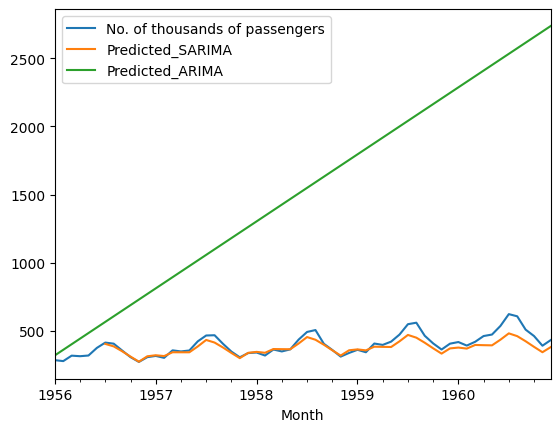

In [64]:
test_data[['No. of thousands of passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()